In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글폰트 지정
plt.rc('font',family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv("/content/EDA 전처리 데이터.csv")

In [6]:
df = df.drop('Unnamed: 0',axis=1)

In [7]:
df

season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  casual  registered  count  month  hour  
0         0.0000       3          13     16      1     0  
1         0.0000       8          32     40      1     1  
2         0.0000       5          27     32      1     2  
3         0.0000       3          10     13      1     3  
4         0.0000       0           1      1      1     4  
...          ...     ...         ...    ...    ...   ...  
10881    26.0027       7         329    336     12    19  
10882    15.0013      10         231    241     12    20  
10883    15.0013       4         164    168     12    21  
10884     6.0032      12         117    129     12    22  
10885     8.9981       4          84     88     12    23  

[10886 rows x 13 columns]

<Axes: >

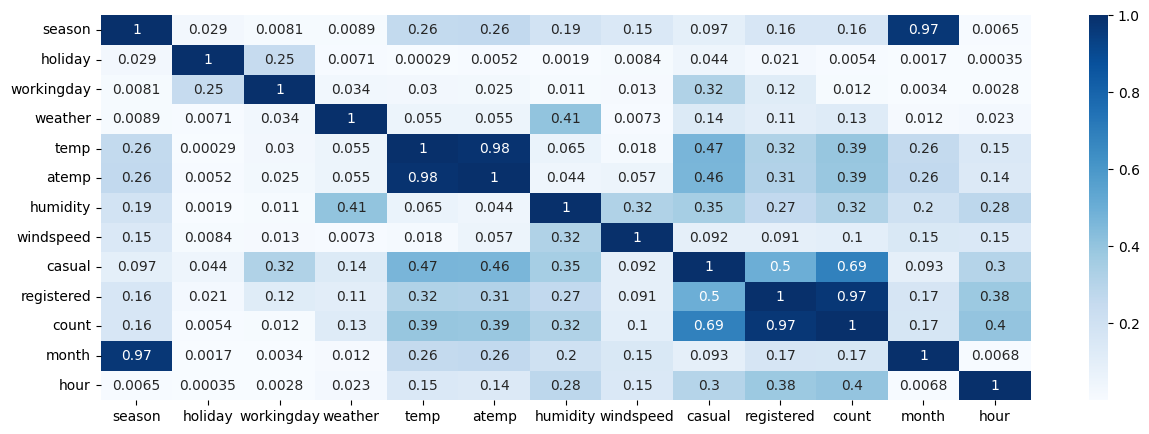

In [8]:
cols = ['season', 'holiday',	'workingday',	'weather',	'temp',	'atemp',	'humidity',	'windspeed',	'casual',	'registered',	'count',	'month',	'hour']

plt.figure(figsize=(15,5))
sns.heatmap(abs(df[cols].corr()), annot=True, cmap='Blues')

In [24]:
cols = ['season', 'holiday',	'workingday',	'weather',	'temp',	'humidity',	'windspeed','count',	'month',	'hour']

abs(df[cols].corr()['count']).sort_values(ascending=False)

count         1.000000
hour          0.400601
temp          0.394454
humidity      0.317371
month         0.166862
season        0.163439
weather       0.128655
windspeed     0.101369
workingday    0.011594
holiday       0.005393
Name: count, dtype: float64

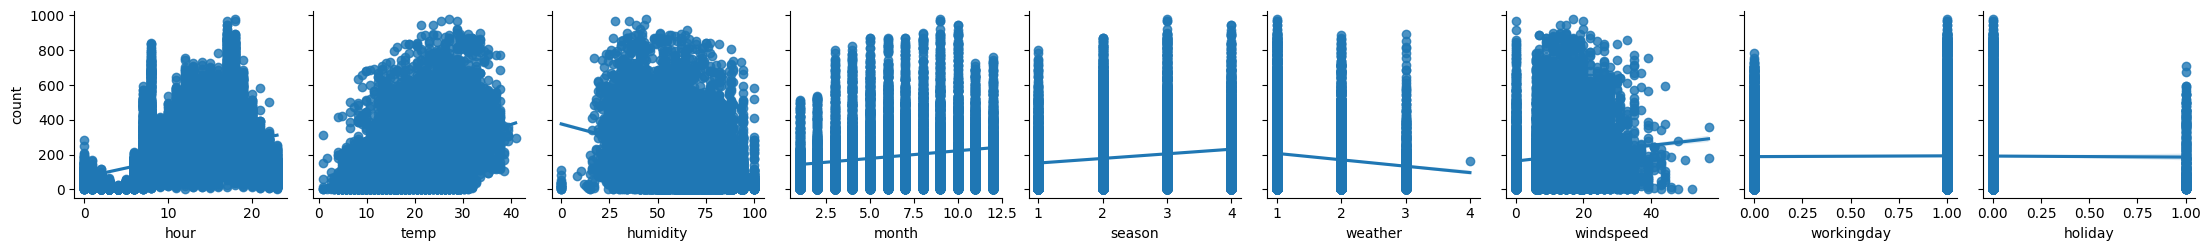

In [25]:
sns.pairplot(data=df
            , x_vars=['hour' , 'temp', 'humidity' ,'month', 'season', 'weather', 'windspeed', 'workingday','holiday']
            , y_vars=['count']
            , kind='reg')

In [26]:
X = df[['hour' , 'temp', 'humidity' ,'month']] # 독립변수는 2차원이어야 한다.
y = df['count']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8708, 4), (2178, 4), (8708,), (2178,))

In [27]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

# 모델 훈련 : 훈련세트로 모델 훈련
lr_model.fit(x_train, y_train)

# 모델의 훈련 결과(기울기, 절편)
print(f'''모델의 훈련 결과
coef:{lr_model.coef_}
intercept:{lr_model.intercept_}
''')

# 모델 평가
# 훈련데이터, 테스트데이터를 이용한 예측값
test_predict = lr_model.predict(x_test)
# print(test_predict)
# print(y_test)
# print(x_test)

# 실제값과 예측값을 이용하여 모델 평가
from sklearn.metrics import r2_score, mean_squared_error
print('R2:',r2_score(y_test, test_predict))
print('MSE:',mean_squared_error(y_test, test_predict))

모델의 훈련 결과
coef:[ 7.54360982  6.85754468 -2.31838369  7.48616185]
intercept:59.84247847267872

R2: 0.3466108897786051
MSE: 22196.86860795301


In [28]:
# 모델 생성 : 빈 모델 객체를 생성한다.
from sklearn.neighbors import KNeighborsRegressor

knr_model = KNeighborsRegressor()

# 모델 훈련 : 훈련세트로 모델 훈련
knr_model.fit(x_train, y_train)

# 모델 평가
# 훈련데이터, 테스트데이터를 이용한 예측값
test_predict = knr_model.predict(x_test)

# 실제값과 예측값을 이용하여 모델 평가
from sklearn.metrics import r2_score, mean_squared_error
print('R2:',r2_score(y_test, test_predict))
print('MSE:',mean_squared_error(y_test, test_predict))

R2: 0.6146203655453638
MSE: 13092.077869605144


R2: 0.4435078367155505
MSE: 18905.09535060198


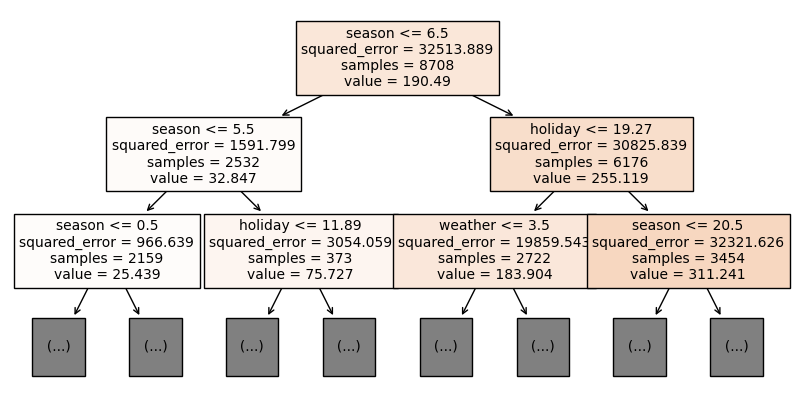

In [29]:
# 모델 생성 : 빈 모델 객체를 생성한다.
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()

# 모델 훈련 : 훈련세트로 모델 훈련
dtr_model.fit(x_train, y_train)

# 훈련 결과
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dtr_model, filled=True, feature_names=cols, fontsize=10,max_depth=2)
# plt.show()

# 모델 평가
# 훈련데이터, 테스트데이터를 이용한 예측값
test_predict = dtr_model.predict(x_test)

# 실제값과 예측값을 이용하여 모델 평가
from sklearn.metrics import r2_score, mean_squared_error
print('R2:',r2_score(y_test, test_predict))
print('MSE:',mean_squared_error(y_test, test_predict))

In [30]:
# 모델 생성 : 빈 모델 객체를 생성한다.
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor()

# 모델 훈련 : 훈련세트로 모델 훈련
rfr_model.fit(x_train, y_train)

# 모델 평가
# 훈련데이터, 테스트데이터를 이용한 예측값
test_predict = rfr_model.predict(x_test)

# 실제값과 예측값을 이용하여 모델 평가
from sklearn.metrics import r2_score, mean_squared_error
print('R2:',r2_score(y_test, test_predict))
print('MSE:',mean_squared_error(y_test, test_predict))

R2: 0.66240589169582
MSE: 11468.712820003728


In [31]:
# 객체생성
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, shuffle=True)

# 모델 생성 함수
def fn_model_create(x,y):
    # sklearn의 linear_model 모듈의 LinearRegression 객체 생성
    lr = LinearRegression()
    lr.fit(x, y)
    return lr

# k-fold 교차검증
r2_score_list = []
mse_list = []
for train_idx, test_idx in kf.split(X,y):
    # print('-'*100)
    # print(train_idx, test_idx)
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_test, y_test = X.iloc[test_idx], y[test_idx]

    # 훈련 데이터로 학습
    model = fn_model_create(X_train , y_train)

    # 테스트 데이터로 평가하여 리스트에 추가
    test_predict = model.predict(X_test)
    r2_score_list.append(r2_score(y_test, test_predict))
    mse_list.append(mean_squared_error(y_test, test_predict))

print(r2_score_list)
print(mse_list)

print(f'''
r2_score : {sum(r2_score_list)/k}
mse : {sum(mse_list)/k}
''')

[0.30366373135212343, 0.37271579253118303, 0.3391429725026881, 0.32517320036376685, 0.3336490658518906]
[22963.81780423127, 21124.74649851499, 20351.606162278746, 22161.28545941668, 22424.949020318352]

r2_score : 0.33486895252033044
mse : 21805.280988952007



In [32]:
from sklearn.neighbors import KNeighborsRegressor

# 객체생성
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, shuffle=True)

# 모델 생성 함수
def fn_model_create(x,y):
    # sklearn의 linear_model 모듈의 LinearRegression 객체 생성
    model = KNeighborsRegressor()
    model.fit(x, y)
    return model

# k-fold 교차검증
r2_score_list = []
mse_list = []
for train_idx, test_idx in kf.split(X,y):
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_test, y_test = X.iloc[test_idx], y[test_idx]

    # 훈련 데이터로 학습
    model = fn_model_create(X_train , y_train)

#     # 테스트 데이터로 평가하여 리스트에 추가
    test_predict = model.predict(X_test)
    r2_score_list.append(r2_score(y_test, test_predict))
    mse_list.append(mean_squared_error(y_test, test_predict))

print(f'''
r2_score : {sum(r2_score_list)/k}
mse : {sum(mse_list)/k}
''')


r2_score : 0.6087041097501907
mse : 12814.715208562004



In [33]:
from sklearn.tree import DecisionTreeRegressor

# 객체생성
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, shuffle=True)

# 모델 생성 함수
def fn_model_create(x,y):
    # sklearn의 linear_model 모듈의 DecisionTreeRegressor 객체 생성
    model = DecisionTreeRegressor()
    model.fit(x, y)
    return model

# k-fold 교차검증
r2_score_list = []
mse_list = []
for train_idx, test_idx in kf.split(X,y):
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_test, y_test = X.iloc[test_idx], y[test_idx]

    # 훈련 데이터로 학습
    model = fn_model_create(X_train , y_train)

#     # 테스트 데이터로 평가하여 리스트에 추가
    test_predict = model.predict(X_test)
    r2_score_list.append(r2_score(y_test, test_predict))
    mse_list.append(mean_squared_error(y_test, test_predict))

print(f'''
r2_score : {sum(r2_score_list)/k}
mse : {sum(mse_list)/k}
''')


r2_score : 0.44164257596827855
mse : 18290.962896773235



In [34]:
from sklearn.ensemble import RandomForestRegressor

# 객체생성
from sklearn.model_selection import KFold
k=5
kf = KFold(n_splits=k, shuffle=True)

# 모델 생성 함수
def fn_model_create(x,y):
    # sklearn의 linear_model 모듈의 LinearRegression 객체 생성
    model = RandomForestRegressor()
    model.fit(x, y)
    return model

# k-fold 교차검증
r2_score_list = []
mse_list = []
for train_idx, test_idx in kf.split(X,y):
    X_train, y_train = X.iloc[train_idx], y[train_idx]
    X_test, y_test = X.iloc[test_idx], y[test_idx]

    # 훈련 데이터로 학습
    model = fn_model_create(X_train , y_train)

#     # 테스트 데이터로 평가하여 리스트에 추가
    test_predict = model.predict(X_test)
    r2_score_list.append(r2_score(y_test, test_predict))
    mse_list.append(mean_squared_error(y_test, test_predict))

print(f'''
r2_score : {sum(r2_score_list)/k}
mse : {sum(mse_list)/k}
''')


r2_score : 0.6498800047075305
mse : 11477.36782053707

